<a href="https://colab.research.google.com/github/qpwisu/datascience/blob/master/h07_%EC%9E%A5%ED%95%9C%EC%98%81_20171696.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

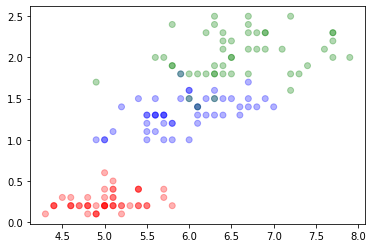

In [37]:
class ltem:
  def __init__(self,vector,label):
    self.vector =vector
    self.label= label 
  def __repr__(self):
    return f"{self.vector}{self.label}"


data = []



with open('iris.data', 'r') as f:
 for line in f:
    if line.strip():
        item = line.strip().split(",")
        vector = [float(x) for x in item[:4]]
        label= item[4]
        data.append(ltem(vector,label))
      
X=[item.vector[0]for item in data]
Y=[item.vector[3]for item in data]
species = {"Iris-setosa":"red","Iris-versicolor":"blue","Iris-virginica":"green"}
C= [species[item.label]for item in data]
plt.scatter(X,Y,c=C,alpha=0.3)
plt.show()

150 120 30


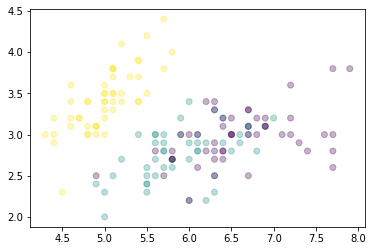

In [5]:
plt.scatter([d[0][0] for d in data],
 [d[0][1] for d in data], c=[d[1] for d in data], alpha=0.3)
plt.show()

In [6]:
random.shuffle(data)
train = data[:-30]
test = data[-30:]

In [68]:
def distance(p1, p2):
 return sum((a-b)**2for a,b in zip(p1,p2))**0.5

  1%|          | 1/100 [00:00<00:14,  7.04it/s]

150 120 30


100%|██████████| 100/100 [00:14<00:00,  6.77it/s]


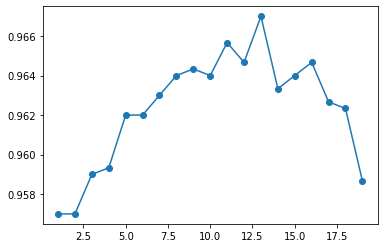

In [71]:
from collections import Counter
random.shuffle(data)
train_size = int(len(data)*0.8)
train= data[:train_size]
test= data[train_size:]
print(len(data),len(train),len(test))

def knn_classify(k, query, train):
 knns = sorted((distance(query, item.vector), item.label) for item in train)[:k]
 t= Counter(x[1]for x in knns).most_common(1)
 return t[0][0]


corrects = [0] *20
num_trials =100
train_size = int(len(data)*0.8)

for _ in tqdm(range(num_trials)):
  random.shuffle(data)
  train= data[:train_size]
  test= data[train_size:]
  for k in range(1,20):
    for item in test:
      answer = knn_classify(k,item.vector,train)
      if answer == item.label:
        corrects[k]+=1
accuracles = [c/(len(test)*num_trials) for c in corrects]
accuracles
plt.plot (range(1,20),accuracles[1:],'o-')
plt.show()
 # 거리에따라 가중치를 주어 점수 계산
#  scores = {}
#  for dist, point in knns:
#     scores[point[1]] = scores.get(point[1], 0) + 1/(1+dist)
#  resp, score = max(scores.items(), key=lambda x: x[1])

#  return resp